In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [5]:
import pickle

In [6]:
with open('df_unsw_train50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [7]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 299)
X teste =  (380959, 299)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [8]:
y_train50_binary_train.value_counts()

0    776326
1    112577
Name: Label_binary, dtype: int64

In [9]:
y_train50_multiclass_train.value_counts()

Benign            776326
Generic            75464
Exploits           15635
Fuzzers             8530
DoS                 5655
Reconnaissance      4899
Analysis             931
Backdoor             832
Shellcode            576
Worms                 55
Name: Label_multiclass, dtype: int64

In [10]:
y_train50_binary_test.value_counts()

0    332900
1     48059
Name: Label_binary, dtype: int64

In [11]:
y_train50_multiclass_test.value_counts()

Benign            332900
Generic            32276
Exploits            6627
Fuzzers             3592
DoS                 2521
Reconnaissance      2094
Analysis             407
Backdoor             332
Shellcode            179
Worms                 31
Name: Label_multiclass, dtype: int64

In [12]:
X_train50_train.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
152963,0.000007,104,0,254,0,0,0,5.942857e+07,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
627588,0.013839,2230,13358,31,29,7,11,1.251536e+06,7.507479e+06,34,...,0,0,0,1,0,0,0,0,0,0
37398,8.233840,25576,1094788,31,29,38,390,2.479523e+04,1.062457e+06,456,...,0,0,0,1,0,0,0,0,0,0
486419,0.000004,200,0,254,0,0,0,2.000000e+08,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
1203796,0.016772,2974,33122,31,29,7,18,1.389459e+09,1.548295e+07,48,...,0,0,0,1,0,0,0,0,0,0


In [13]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'Exploits' 'DoS' 'Generic' 'Reconnaissance' 'Fuzzers' 'Analysis'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [14]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [16]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [17]:
with open('df_unsw_test50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [18]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 299)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [19]:
y_test50_multiclass.value_counts()

Benign            1109226
Generic            107740
Exploits            22262
Fuzzers             12123
DoS                  8176
Reconnaissance       6993
Analysis             1338
Backdoor             1164
Shellcode             755
Worms                  87
Name: Label_multiclass, dtype: int64

In [20]:
y_test50_binary.value_counts()

0    1109226
1     160638
Name: Label_binary, dtype: int64

In [21]:
X_test50.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.022495,2934,3742,31,29,11,15,1.023516e+06,1.306246e+06,52,...,0,0,0,0,0,0,0,0,0,0
1,0.001105,146,178,31,29,0,0,5.285068e+05,6.443439e+05,2,...,0,0,0,0,0,0,0,0,0,0
2,0.573081,824,1298,62,252,2,2,1.035805e+04,1.585814e+04,10,...,0,1,0,0,0,0,0,0,0,0
3,0.001063,146,178,31,29,0,0,5.493886e+05,6.698025e+05,2,...,0,0,0,0,0,0,0,0,0,0
4,0.001016,146,178,31,29,0,0,5.748031e+05,7.007874e+05,2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'Generic' 'Backdoor' 'Analysis' 'DoS' 'Exploits'
 'Reconnaissance' 'Fuzzers' 'Worms' 'Shellcode']
[0 1]


In [23]:
#X_test50.shape

In [24]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [25]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [27]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo kNN para Train e Validation - Train50

In [28]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [29]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [30]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [29]:
predict_train50_binary

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
y_train50_binary_test

array([1, 0, 0, ..., 1, 0, 0])

In [31]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9779083838418308

### Visualização da árvore binária

In [32]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [33]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [34]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [35]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [31]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [32]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [39]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'DoS', 'Benign', 'Benign'],
      dtype=object)

In [40]:
y_train50_multiclass_test

array(['Exploits', 'Benign', 'Benign', ..., 'Exploits', 'Benign',
       'Benign'], dtype=object)

In [41]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9631797647515874

### Visualização da árvore multiclasse

In [42]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [43]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [44]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [45]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [46]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.981467  0.993479  0.987436    332900
           1   0.950642  0.870056  0.908565     48059

    accuracy                       0.977908    380959
   macro avg   0.966055  0.931767  0.948001    380959
weighted avg   0.977579  0.977908  0.977487    380959



In [47]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.091398  0.125307  0.105699       407
      Backdoor   0.057018  0.039157  0.046429       332
        Benign   0.979934  0.994770  0.987297    332900
           DoS   0.336825  0.331614  0.334199      2521
      Exploits   0.380804  0.294553  0.332171      6627
       Fuzzers   0.413586  0.230512  0.296031      3592
       Generic   0.994448  0.971155  0.982663     32276
Reconnaissance   0.696395  0.350525  0.466328      2094
     Shellcode   0.285714  0.078212  0.122807       179
         Worms   1.000000  0.000000  0.000000        31

      accuracy                       0.963180    380959
     macro avg   0.523612  0.341581  0.367362    380959
  weighted avg   0.957509  0.963180  0.959556    380959



### Cross Validation do train50

In [33]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [34]:
score_cv_train50_binary

array([0.97780428, 0.97750053, 0.97840051, 0.97735403, 0.97719654,
       0.97817527, 0.97727528, 0.97791653, 0.97790528, 0.97707279])

In [35]:
cv_result_train50_binary

[0.977660103830212]

In [37]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [38]:
score_cv_train50_multiclass

array([0.9621784 , 0.9619534 , 0.96316837, 0.96190798, 0.96298796,
       0.9640567 , 0.96238047, 0.96290921, 0.96319046, 0.96225672])

In [39]:
cv_result_train50_multiclass

[0.9626989680502005]

### Matriz de Confusão do train50

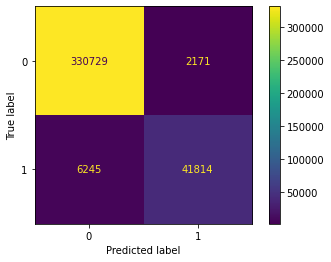

In [40]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

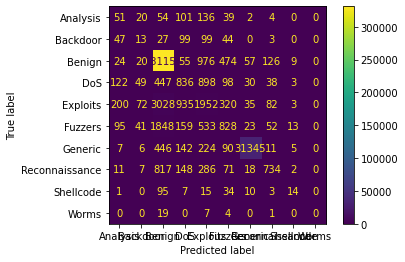

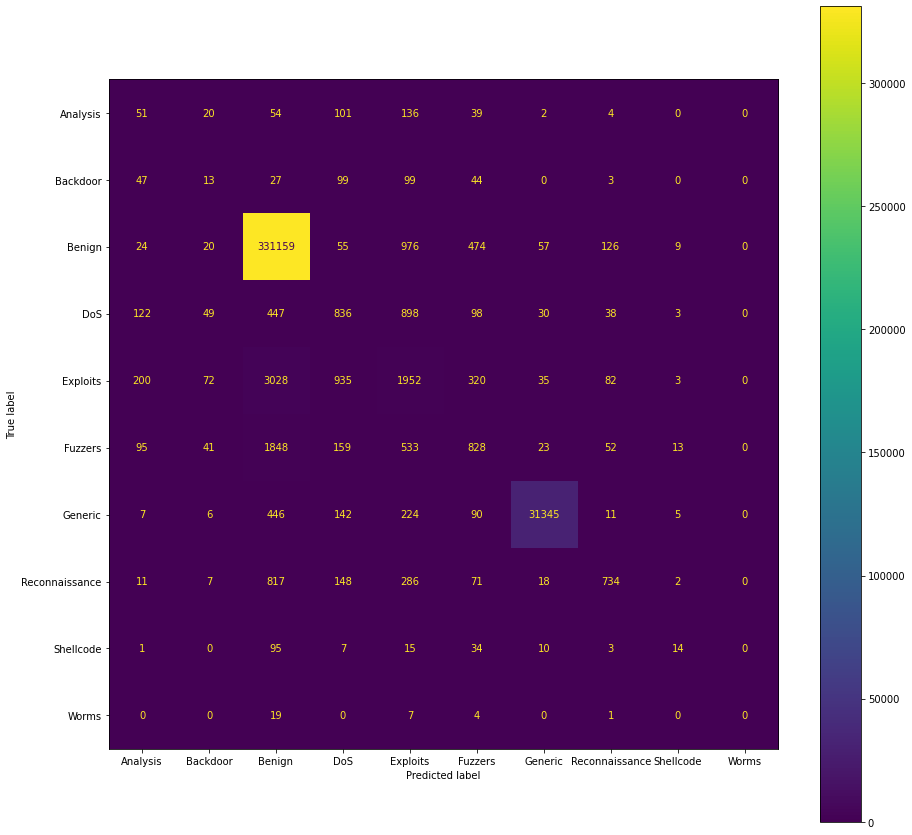

In [41]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [42]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [43]:
predict_test50_binary

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
y_test50_binary

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8315244782118401

### Predição test50 multiclasse

In [46]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [47]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'DoS', 'Benign', 'Benign'],
      dtype=object)

In [48]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Exploits', 'Benign', 'Benign'],
      dtype=object)

In [49]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8360533096457573

### Precision e Recall do test50

In [50]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.978143  0.825574  0.895406   1109226
           1   0.420122  0.872614  0.567176    160638

    accuracy                       0.831524   1269864
   macro avg   0.699132  0.849094  0.731291   1269864
weighted avg   0.907553  0.831524  0.853885   1269864



In [51]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.012862  0.002990  0.004851      1338
      Backdoor   0.000000  0.000000  0.000000      1164
        Benign   0.976707  0.850699  0.909358   1109226
           DoS   0.210835  0.633072  0.316323      8176
      Exploits   0.084871  0.109514  0.095630     22262
       Fuzzers   0.041075  0.221562  0.069303     12123
       Generic   0.640200  0.977668  0.773738    107740
Reconnaissance   0.463231  0.334191  0.388270      6993
     Shellcode   0.005514  0.108609  0.010496       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.836053   1269864
     macro avg   0.243530  0.323831  0.256797   1269864
  weighted avg   0.913275  0.836053  0.866495   1269864



### Matriz de Confusão do test50

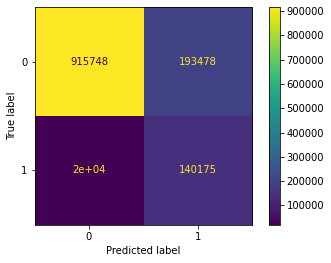

In [52]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

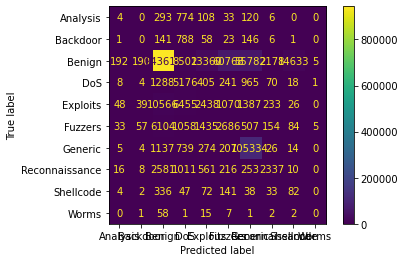

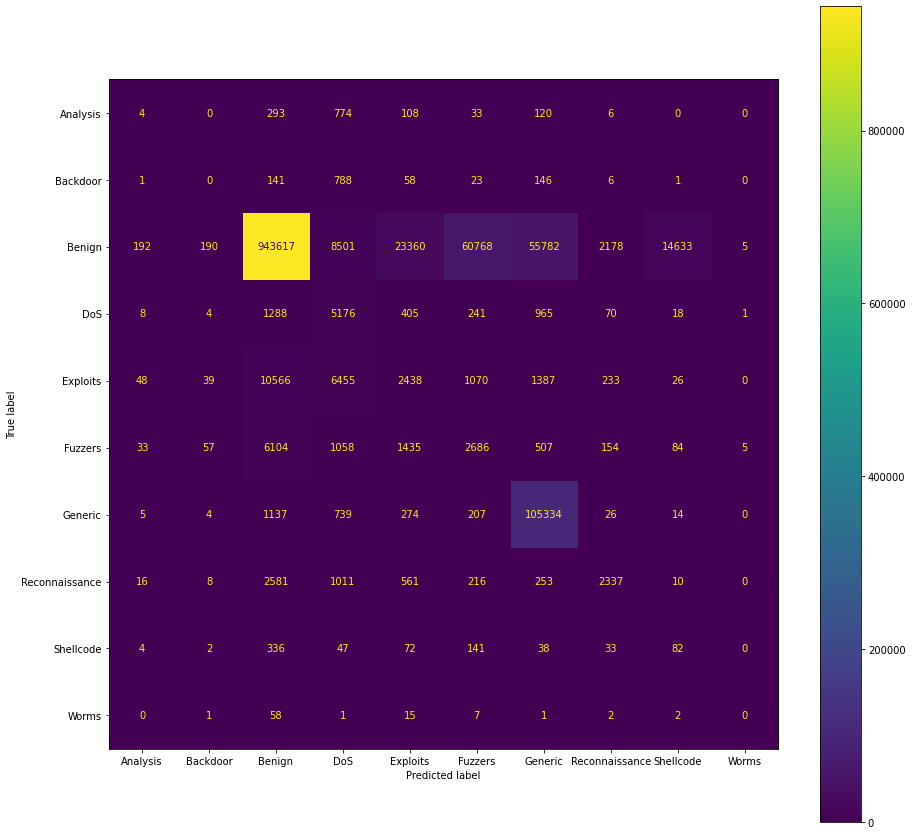

In [53]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)